## Loading the Trained Model

The previously trained model and preprocessing scaler are loaded from the saved artifacts directory.  
This ensures that evaluation is performed on the exact same trained model used during training, maintaining consistency and reproducibility.


In [11]:
import sys
import os
sys.path.append(os.path.abspath("../ML"))
from model_training.evaluate import evaluate



In [12]:
import joblib

model = joblib.load("../ML/model_training/artifacts/model.pkl")
scaler = joblib.load("../ML/model_training/artifacts/scaler.pkl")


## Data Preprocessing for Evaluation

The dataset is loaded and preprocessed using the same preprocessing pipeline applied during training.  
This guarantees that feature scaling and transformations are identical, preventing data leakage and ensuring valid evaluation results.

In [13]:
from model_training.preprocess import preprocess_data

X_train, X_test, y_train, y_test, scaler = preprocess_data()



## Model Evaluation

The `evaluate()` function is used to compute key performance metrics:

- **Accuracy** – Overall proportion of correctly classified instances.
- **Precision** – Measures how many predicted positive cases were actually positive.
- **Recall** – Measures how many actual positive cases were correctly identified.
- **F1-score** – Harmonic mean of precision and recall, providing a balanced performance metric.
- **ROC-AUC (if available)** – Measures the model’s ability to distinguish between classes.

These metrics provide a comprehensive assessment beyond simple accuracy.


In [14]:
metrics = evaluate(model, X_test, y_test)
metrics


{'accuracy': 0.8435754189944135,
 'precision': 0.8253968253968254,
 'recall': 0.7536231884057971,
 'f1': 0.7878787878787878,
 'roc_auc': 0.8774703557312252}

## Confusion Matrix

The confusion matrix provides a detailed breakdown of classification results:

- **True Positives (TP):** Correctly predicted survivors  
- **True Negatives (TN):** Correctly predicted non-survivors  
- **False Positives (FP):** Incorrectly predicted survivors  
- **False Negatives (FN):** Incorrectly predicted non-survivors  

Unlike accuracy, the confusion matrix allows deeper analysis of model errors.


In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm


array([[99, 11],
       [17, 52]])

## Confusion Matrix Visualization

The confusion matrix is visualized using a heatmap to improve interpretability.  
This graphical representation makes it easier to identify patterns in classification errors and assess whether the model favors one class over another.

Visual inspection helps determine whether improvements are needed in specific areas, such as reducing false negatives or false positives.


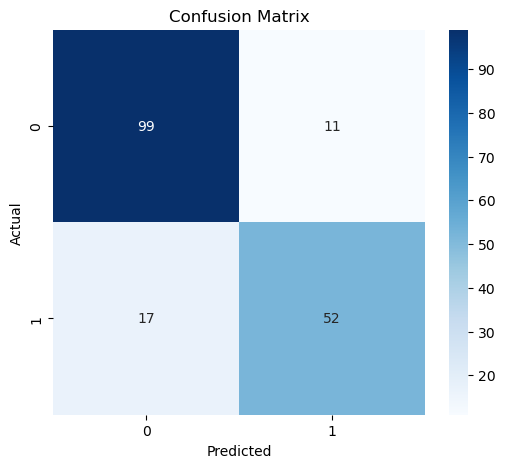

In [16]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()


## Interpretation of Results

The evaluation results demonstrate the predictive performance of the Titanic survival model.  
While accuracy provides an overall success rate, additional metrics such as precision, recall, and F1-score offer deeper insight into classification balance.

The confusion matrix highlights specific areas where the model performs well and where misclassifications occur. This analysis helps guide future model improvements.


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.90      0.88       110
           1       0.83      0.75      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



## Discussion

Although the model achieves satisfactory overall accuracy, performance must be interpreted in the context of class imbalance.  
Metrics such as F1-score and ROC-AUC provide a more reliable evaluation for binary classification problems.

The confusion matrix reveals how effectively the model distinguishes between survivors and non-survivors, supporting a more comprehensive evaluation strategy.
